<a href="https://colab.research.google.com/github/LaurindoJr/Machine-Learning/blob/main/Q1Q2_ricewithbeansandsalad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from abc import ABC, abstractmethod
from typing import Any
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange
import plotly.express as px
import plotly.graph_objs as go

## **Questao 1**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/artificial1d.csv', header=None, names=['x', 'y'])

In [3]:
df.dtypes

x    float64
y    float64
dtype: object

## **Preparando os Dados**

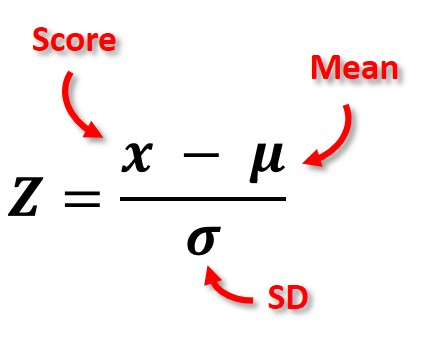

In [4]:
def z_score(df: np.ndarray): 
        mean = df.mean()
        sd = df.std()
        z = (df-mean)/sd 
        return z, lambda x: (sd*x) + mean

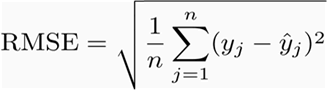

In [5]:
def rmse(real_df: np.ndarray, predicted_df: np.ndarray) -> float:
        diff = (real_df - predicted_df) ** 2
        return np.sqrt(diff.mean())

In [6]:
z_score(df)# Normalização de Zscore

(           x         y
 0  -1.647089 -2.017762
 1  -1.533497 -1.309044
 2  -1.419905 -1.101243
 3  -1.306312 -0.883802
 4  -1.192720 -0.331011
 5  -1.079127 -0.468173
 6  -0.965535 -0.809468
 7  -0.851943 -0.895181
 8  -0.738350 -0.908164
 9  -0.624758 -0.872442
 10 -0.511166 -0.897043
 11 -0.397573 -1.223600
 12 -0.283981 -0.738895
 13 -0.170389 -0.487763
 14 -0.056796  0.029363
 15  0.056796  0.264092
 16  0.170389  0.028028
 17  0.283981  0.593774
 18  0.397573  1.166647
 19  0.511166  0.876850
 20  0.624758  0.878171
 21  0.738350  1.015138
 22  0.851943  1.431060
 23  0.965535  0.508255
 24  1.079127  0.494481
 25  1.192720  0.596410
 26  1.306312  0.709345
 27  1.419905  0.975117
 28  1.533497  1.272194
 29  1.647089  2.104667, <function __main__.z_score.<locals>.<lambda>>)

## **Separando os dados**

In [7]:
normalized_x, cone = z_score(df['x'].to_numpy()) # Armazenando Dados

In [8]:
normalized_y, denormalized_y = z_score(df['y'].to_numpy())# Armazenando Dados

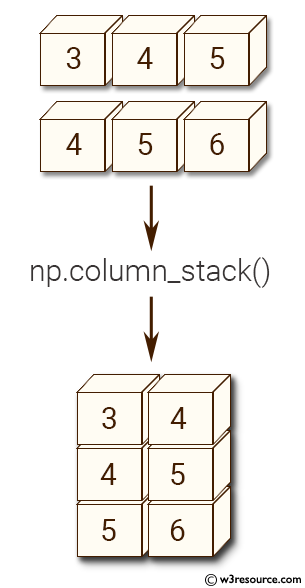

In [9]:
def add_onescolumn(df: np.ndarray): #empilando o array
         return np.column_stack([np.ones(df.shape[0]), df ])

In [10]:
X_ones = add_onescolumn(normalized_x)
X_ones

array([[ 1.        , -1.67524673],
       [ 1.        , -1.55971247],
       [ 1.        , -1.44417822],
       [ 1.        , -1.32864396],
       [ 1.        , -1.2131097 ],
       [ 1.        , -1.09757545],
       [ 1.        , -0.98204119],
       [ 1.        , -0.86650693],
       [ 1.        , -0.75097267],
       [ 1.        , -0.63543842],
       [ 1.        , -0.51990416],
       [ 1.        , -0.4043699 ],
       [ 1.        , -0.28883564],
       [ 1.        , -0.17330139],
       [ 1.        , -0.05776713],
       [ 1.        ,  0.05776713],
       [ 1.        ,  0.17330139],
       [ 1.        ,  0.28883564],
       [ 1.        ,  0.4043699 ],
       [ 1.        ,  0.51990416],
       [ 1.        ,  0.63543842],
       [ 1.        ,  0.75097267],
       [ 1.        ,  0.86650693],
       [ 1.        ,  0.98204119],
       [ 1.        ,  1.09757545],
       [ 1.        ,  1.2131097 ],
       [ 1.        ,  1.32864396],
       [ 1.        ,  1.44417822],
       [ 1.        ,

In [11]:
def reshape_vector(x: np.ndarray): #Remodela o Array sem alterar os dados compativel a forma original
        return x.reshape([-1, 1])

In [12]:
y = reshape_vector(normalized_y)
y

array([[-2.05225665],
       [-1.33142282],
       [-1.12006895],
       [-0.89891082],
       [-0.33667005],
       [-0.47617613],
       [-0.82330647],
       [-0.91048398],
       [-0.92368912],
       [-0.88735694],
       [-0.91237789],
       [-1.2445175 ],
       [-0.75152664],
       [-0.49610104],
       [ 0.02986453],
       [ 0.26860656],
       [ 0.02850739],
       [ 0.60392426],
       [ 1.18659107],
       [ 0.89184046],
       [ 0.8931833 ],
       [ 1.03249214],
       [ 1.45552426],
       [ 0.51694346],
       [ 0.50293433],
       [ 0.60660624],
       [ 0.72147105],
       [ 0.9917867 ],
       [ 1.29394214],
       [ 2.14064714]])

## **Visualização**

In [13]:
def show_rmse_curve(history, title='RMSE Curve'):
    rmse_values = [step['rmse_error'] for step in history]
    steps = [i for i, _ in enumerate(history)]
    fig = px.line(x=steps, y=rmse_values, labels={'x':'steps', 'y':'RMSE'}, title=title)
    return fig

def show_final_result(history, 
                      denormalized_function=denormalized_y,
                      title='Model Result', 
                      x=df['x'],
                      y=df['y'],
                      test_matrix=X_ones):
    
    if isinstance(history, list):
        final_model = history[-1]['model']
    else:
        final_model = history
    
    preds = denormalized_y(final_model.predict(test_matrix))
    fig = px.scatter(x=x, y=y, title=title)
    fig.add_trace(
        go.Scatter(x=x, y=preds[:, 0])
    )
    
    return fig

## **Preparando Modelo de Regressao**

In [14]:
class LinearModel:

    w: np.ndarray #peso

    def __init__(self, w: np.ndarray):
        self.w = w.reshape([-1, 1])

    @staticmethod
    def first_model(lenght: int, fill_value: float) -> 'LinearModel':
        w = np.full(shape=lenght,fill_value=fill_value).reshape([-1, 1])
        return LinearModel(w)

    def predict(self, x: np.ndarray):
        return x @ self.w

    def update(self, w: np.ndarray):
        self.w = w.reshape([-1, 1])

    def __copy__(self):
        return LinearModel(self.w.reshape([-1, 1]))

    def __str__(self):

        return self.w.__str__()

In [15]:
class LinearAlgoritm(ABC):

    initial_w_values: float
    ephocs: int
    alpha: float
    with_history_predictions: bool
    seed: int
    l2_regulazation: float

    def __init__(self, alpha=0.01, ephocs=100, initial_w_values=1, l2_regulazation=0, with_history_predictions=False, seed=1234):

        self.l2_regulazation = l2_regulazation
        self.seed = seed
        self.with_history_predictions = with_history_predictions
        self.initial_w_values = initial_w_values
        self.ephocs = ephocs
        self.alpha = alpha

    @abstractmethod
    def fit(self, dfx: np.ndarray, dfy: np.ndarray, **kwargs): pass

## **OLS**

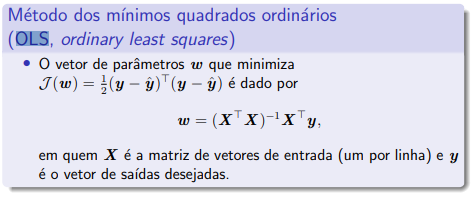

In [17]:
class OrdinaryLeastSquares(LinearAlgoritm):

	def fit(self, dfx: np.ndarray, dfy: np.ndarray, **kwargs):
		l2_reg_matrix = np.eye(dfx.shape[1]) * self.l2_regulazation
		w = np.linalg.inv( (dfx.T @ dfx) + l2_reg_matrix ) @ dfx.T @ y
		return LinearModel(w)

In [18]:
ols = OrdinaryLeastSquares(ephocs=1000, with_history_predictions=True)

In [19]:
model_ols = ols.fit(X_ones, y)

In [20]:
show_final_result(model_ols)

## **Gradiente Descendente**

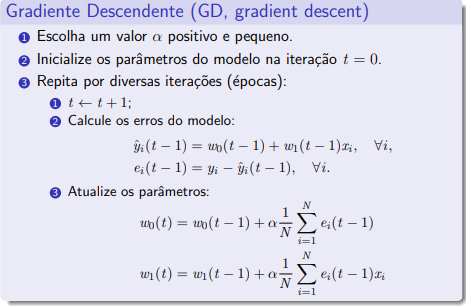

In [21]:
class GradientDescent(LinearAlgoritm):

    def __step_training(self, dfx: np.ndarray, dfy: np.ndarray, model: LinearModel):
        predicted = model.predict(dfx)
        error = y - predicted
        w = model.w + self.alpha * ( (1 / dfx.shape[0]) * (dfx.T @ error) - self.l2_regulazation*model.w)
        model.update(w)
        return model

    def __training_loop(self, dfx: np.ndarray, dfy: np.ndarray, model: LinearModel):
        pbar = trange(self.ephocs)
        for ephoc in pbar:
            model = self.__step_training(dfx, dfy, model)
            predicted = model.predict(dfx)
            error = rmse(dfy, predicted)
            pbar.set_description(f"RMSE: {error} \n")

            yield {
                'ephoc': ephoc,
                'model': model.__copy__(),
                'rmse_error': error
            }

    def fit(self, dfx: np.ndarray, dfy: np.ndarray, **kwargs):

        first_model = LinearModel.first_model(
            lenght=dfx.shape[1],
            fill_value=self.initial_w_values
        )

        history = list(self.__training_loop(dfx, dfy, first_model))

        if self.with_history_predictions:
            return history

        final_model = history[-1]['model']

        return final_model

In [22]:
gd = GradientDescent(ephocs=1000, with_history_predictions=True, l2_regulazation=0.001)

In [23]:
history_gd = gd.fit(X_ones, y)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [24]:
show_rmse_curve(history_gd)

In [25]:
show_final_result(history_gd)


## **Gradiente Descendente Estocastico**

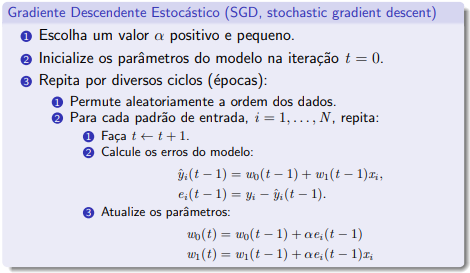

In [29]:
class StochasticGradientDescent(LinearAlgoritm):

	def __step_training(self, x: np.ndarray, y: np.ndarray, model: LinearModel):
		predicted = model.predict(x)
		error = (y - predicted)
		w = model.w + (self.alpha * (error * x.T - (self.l2_regulazation * model.w) ))
		model.update(w)
		return model

	def __training_loop(self, x: np.ndarray, y: np.ndarray, model: LinearModel):
		pbar = trange(self.ephocs)
		for ephoc in pbar:
			for observation, correct_value in zip(x, y):
				observation, correct_value = observation.reshape([1, -1]), correct_value[0]
				model = self.__step_training(observation, correct_value, model)
				predicted = model.predict(x)
				error = rmse(y, predicted)

				yield {
					'ephoc': ephoc,
					'model': model.__copy__(),
					'rmse_error': error
				}

			pbar.set_description(f"RMSE: {error} \n")

	def fit(self, x: np.ndarray, y: np.ndarray, **kwargs):
		first_model = LinearModel.first_model(
			lenght=x.shape[1],
			fill_value=self.initial_w_values
		)

		idx = np.arange(x.shape[0])
		np.random.shuffle(idx)

		x_shuffle = x[idx]
		y_shuffle = y[idx]

		history = list(self.__training_loop(x_shuffle, y_shuffle, first_model))

		if self.with_history_predictions:
			return history

		final_model = history[-1]['model']

		return final_model

In [30]:
gde = StochasticGradientDescent(ephocs=100, with_history_predictions=True, l2_regulazation=0.001)

In [31]:
history_gde = gde.fit(X_ones, y)


  0%|          | 0/100 [00:00<?, ?it/s]

In [32]:
show_rmse_curve(history_gde)


In [33]:
show_final_result(history_gde)


## **Regressão Polinomial**

In [ ]:
def generate_polynomial_order(dfx: np.ndarray, order: int, with_bias=False):

        if with_bias: x = add_onescolumn(dfx)
        pow_arrays = [x[:, c] ** i for c in range(1, x.shape[1]) for i in range(2, order)]
        return np.column_stack([x, *pow_arrays])

In [ ]:
X_pow = generate_polynomial_order(X_ones, 11)

In [ ]:
model_p_ols = ols.fit(X_pow, y)

In [ ]:
show_final_result(model_p_ols, test_matrix=X_pow)


## **Questao 2**

In [ ]:
df_p = pd.read_csv('/content/drive/MyDrive/Data/california.csv', header=None)

## **Preparando dados**

In [ ]:
arr = df_p.to_numpy()

In [ ]:
X_p = arr[:, :8]

In [ ]:
y_p = reshape_vector(arr[:, 8])

## **Normalizando**

In [ ]:
X_norm = np.empty_like(X_p)

for idx, col in enumerate(X_p.T):
    norm, _= z_score(col)
    X_norm[:, idx] = norm

In [ ]:
y_norm, denormalized_y_p = z_score(y_p)

## **Testando**

In [ ]:
def my_greate_test(max_order, l2_reg=0):
    
    orders = [i for i in range(1, max_order)]
    ols = OrdinaryLeastSquares(l2_regulazation=l2_reg)
    rmse_erros_train = []
    rmse_erros_test = []
    
    X_trn, X_tst, y_trn, y_tst = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)
    
    for order in orders:
        
        X_train_pow = generate_polynomial_order(X_trn, order, with_bias=True)
        X_tst_pow = generate_polynomial_order(X_tst, order, with_bias=True)
        
        model = ols.fit(X_train_pow, y_trn)
        
        preds_train = model.predict(X_train_pow)
        preds_test = model.predict(X_tst_pow)
        
        rmse_erros_train.append(rmse(
        denormalized_y_p(y_trn),
        denormalized_y_p(preds_train)
        ))
        
        rmse_erros_test.append(rmse(
        denormalized_y_p(y_tst),
        denormalized_y_p(preds_test)
        ))
    
    
    plots = [
        go.Scatter(x=orders, y=rmse_erros_train, name='Train RMSE'),
        go.Scatter(x=orders, y=rmse_erros_test, name='Test RMSE')
    ]
        
    fig = go.Figure(data=plots)

    return fig
        

In [ ]:
fig = my_greate_test(11)

In [ ]:
fig

In [ ]:
fig = my_greate_test(11, l2_reg=0.001)

In [ ]:
fig